In [1]:
import os
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')
!pip install graphviz

In [2]:
import os

#get the current working directory
print(os.getcwd())

#check whether your file exists in the current working directory
os.path.exists("Nextlixdataset.csv")

/Users/jimmyaspras/Downloads


True

In [3]:
# Load data
path = "./Nextlixdataset.csv"
df = pd.read_csv(path)[["title", "rating", "type", "date_added", "release_year", "listed_in"]]
# Take a look at the data
df.head(5)

,title,rating,type,date_added,release_year,listed_in
0,3%,TV-MA,TV Show,"August 14, 2020",2020,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,7:19,TV-MA,Movie,"December 23, 2016",2016,"Dramas, International Movies"
2,23:59,R,Movie,"December 20, 2018",2011,"Horror Movies, International Movies"
3,9,PG-13,Movie,"November 16, 2017",2009,"Action & Adventure, Independent Movies, Sci-Fi..."
4,21,PG-13,Movie,"January 1, 2020",2008,Dramas


In [4]:
df.dtypes

title           object
rating          object
type            object
date_added      object
release_year     int64
listed_in       object
dtype: object

In [5]:
df.shape

(7787, 6)

In [6]:
#Please provide a table of the 5 most used ratings (rating) for TV Shows (only) (type). 
#The table should have a column for rating, number of TV shows with that rating, 
#and percentage of TV shows with that rating.

In [7]:
#Filter data by TV Show
tvdf = df[(df.type == "TV Show")]
tvdf.head()

,title,rating,type,date_added,release_year,listed_in
0,3%,TV-MA,TV Show,"August 14, 2020",2020,"International TV Shows, TV Dramas, TV Sci-Fi &..."
5,46,TV-MA,TV Show,"July 1, 2017",2016,"International TV Shows, TV Dramas, TV Mysteries"
11,1983,TV-MA,TV Show,"November 30, 2018",2018,"Crime TV Shows, International TV Shows, TV Dramas"
12,1994,TV-MA,TV Show,"May 17, 2019",2019,"Crime TV Shows, Docuseries, International TV S..."
16,Feb-09,TV-14,TV Show,"March 20, 2019",2018,"International TV Shows, TV Dramas"


In [8]:
#Check rows of data
tvdf.count()

title           2410
rating          2408
type            2410
date_added      2400
release_year    2410
listed_in       2410
dtype: int64

In [9]:
#Count all values and display top 5 values/percentages
#Assign column variable
s = tvdf['rating']
#Count/group unique iterations and assign to var
counts = s.value_counts()
#Calculate relative frequencies, assign to var
percent = s.value_counts(normalize=True)
#Calculate %, assign to var
percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
#tvpddf = tv pandas df; create pd df with counts/percentages
tvpddf = pd.DataFrame({'Occurrences': counts, 'Precent of TV Shows': percent100})
tvpddf.head()

,Occurrences,Precent of TV Shows
TV-MA,1018,42.3%
TV-14,659,27.4%
TV-PG,301,12.5%
TV-Y7,176,7.3%
TV-Y,163,6.8%


In [10]:
#Graph the number of movies compared to the number of TV shows (type) that were added (date_added) 
#each year between 2010 and 2020. Provide a brief explanation about the trend you’re seeing. 
#The graph does not need to be pretty!

In [11]:
#Filter by show/year
#Transform date_added to datetime
df['DateTime'] = pd.to_datetime(df['date_added'])
#Transform DateTime to Year added
df['YearAdded'] = df['DateTime'].dt.year
#Filter to 2010-2020 inclusive
showyeardf = df[(df.type == "TV Show") & (df.YearAdded.between(2010, 2020, inclusive=True))]
showyeardf.head()

,title,rating,type,date_added,release_year,listed_in,DateTime,YearAdded
0,3%,TV-MA,TV Show,"August 14, 2020",2020,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020-08-14,2020.0
5,46,TV-MA,TV Show,"July 1, 2017",2016,"International TV Shows, TV Dramas, TV Mysteries",2017-07-01,2017.0
11,1983,TV-MA,TV Show,"November 30, 2018",2018,"Crime TV Shows, International TV Shows, TV Dramas",2018-11-30,2018.0
12,1994,TV-MA,TV Show,"May 17, 2019",2019,"Crime TV Shows, Docuseries, International TV S...",2019-05-17,2019.0
16,Feb-09,TV-14,TV Show,"March 20, 2019",2018,"International TV Shows, TV Dramas",2019-03-20,2019.0


In [12]:
#Number of shows by year
#sy = show year
sy = showyeardf['YearAdded']
#Count unique values by year, assign var
sycounts = sy.value_counts()
#sypddf = show year pd df
sypddf = pd.DataFrame({'Occurrences': sycounts})
sypddf.head(11)

,Occurrences
2020.0,697
2019.0,656
2018.0,430
2017.0,361
2016.0,185
2015.0,30
2014.0,6
2013.0,5


In [13]:
#Filter by movie/year, 2010-2020 inclusive
movieyeardf = df[(df.type == "Movie") & (df.YearAdded.between(2010, 2020, inclusive=True))]
movieyeardf.head()

,title,rating,type,date_added,release_year,listed_in,DateTime,YearAdded
1,7:19,TV-MA,Movie,"December 23, 2016",2016,"Dramas, International Movies",2016-12-23,2016.0
2,23:59,R,Movie,"December 20, 2018",2011,"Horror Movies, International Movies",2018-12-20,2018.0
3,9,PG-13,Movie,"November 16, 2017",2009,"Action & Adventure, Independent Movies, Sci-Fi...",2017-11-16,2017.0
4,21,PG-13,Movie,"January 1, 2020",2008,Dramas,2020-01-01,2020.0
6,122,TV-MA,Movie,"June 1, 2020",2019,"Horror Movies, International Movies",2020-06-01,2020.0


In [14]:
#Number of movies by year
my = movieyeardf['YearAdded']
#Count occurrences
mycounts = my.value_counts()
#mypddf = movie year pd df
mypddf = pd.DataFrame({'Occurrences': mycounts})
mypddf.head(11)

,Occurrences
2019.0,1497
2020.0,1312
2018.0,1255
2017.0,864
2016.0,258
2015.0,58
2014.0,19
2011.0,13
2013.0,6
2012.0,3


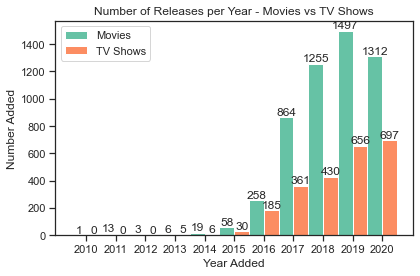

In [15]:
#Graph movies vs shows
labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
Movie_Releases = [1, 13, 3, 6, 19, 58, 258, 864, 1255, 1497, 1312]
TV_Show_Releases = [0, 0, 0, 5, 6, 30, 185, 361, 430, 656, 697]

#Label locations
x = np.arange(len(labels))
#Bar width
width = 0.5

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Movie_Releases, width, label='Movies')
rects2 = ax.bar(x + width/2, TV_Show_Releases, width, label='TV Shows')

#Labels
ax.set_ylabel('Number Added')
ax.set_xlabel('Year Added')
ax.set_title('Number of Releases per Year - Movies vs TV Shows')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#Numbers above bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [16]:
#What is the most common category (listed_in) that movies and TV shows 
#have been listed in throughout the entire dataset? 
#(Note that movies/shows often list multiple categories – we are looking for 
#the most common unique categories listed, not combination of categories).

In [17]:
#Create a df for categorie including list_in only
dfcat = df.drop(['title', 'rating', 'type', 'date_added', 'release_year', 'DateTime', 'YearAdded'], axis=1)

In [18]:
#Split the data strings that are separated by commas
new = dfcat['listed_in'].str.split(pat=", ", n=-1, expand=True)
new.append(None)
dfcat = dfcat.fillna(value=np.nan)
#Split data into new columns named Category1, Catgeory2, and Category3
dfcat['Category1'] = new[0]
dfcat['Category2'] = new[1]
dfcat['Category3'] = new[2]
dfcat.head()

,listed_in,Category1,Category2,Category3
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,"Dramas, International Movies",Dramas,International Movies,None
2,"Horror Movies, International Movies",Horror Movies,International Movies,None
3,"Action & Adventure, Independent Movies, Sci-Fi...",Action & Adventure,Independent Movies,Sci-Fi & Fantasy
4,Dramas,Dramas,None,None


In [19]:
#Drop listed_in so only single categories remain
dfcat = dfcat.drop(['listed_in'], axis=1)
dfcat.head()

,Category1,Category2,Category3
0,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,Dramas,International Movies,None
2,Horror Movies,International Movies,None
3,Action & Adventure,Independent Movies,Sci-Fi & Fantasy
4,Dramas,None,None


In [20]:
#Stack to aggregate/count unique values and return max frequencies
dfcat.stack().value_counts()

International Movies            2437
Dramas                          2106
Comedies                        1471
International TV Shows          1199
Documentaries                    786
Action & Adventure               721
TV Dramas                        704
Independent Movies               673
Children & Family Movies         532
Romantic Movies                  531
TV Comedies                      525
Thrillers                        491
Crime TV Shows                   427
Kids' TV                         414
Docuseries                       353
Romantic TV Shows                333
Stand-Up Comedy                  329
Music & Musicals                 321
Horror Movies                    312
British TV Shows                 232
Reality TV                       222
Sci-Fi & Fantasy                 218
Sports Movies                    196
TV Action & Adventure            150
Korean TV Shows                  150
Anime Series                     148
Spanish-Language TV Shows        147
C

In [21]:
#Optional question: Compare comedy movies/shows trend to overall trend analyzed in Q3

In [22]:
#Filter to TV Shows, 2010-2020 inclusive
csdf = df[(df.type == "TV Show") & (df.YearAdded.between(2010, 2020, inclusive=True))]
csdf.head()

,title,rating,type,date_added,release_year,listed_in,DateTime,YearAdded
0,3%,TV-MA,TV Show,"August 14, 2020",2020,"International TV Shows, TV Dramas, TV Sci-Fi &...",2020-08-14,2020.0
5,46,TV-MA,TV Show,"July 1, 2017",2016,"International TV Shows, TV Dramas, TV Mysteries",2017-07-01,2017.0
11,1983,TV-MA,TV Show,"November 30, 2018",2018,"Crime TV Shows, International TV Shows, TV Dramas",2018-11-30,2018.0
12,1994,TV-MA,TV Show,"May 17, 2019",2019,"Crime TV Shows, Docuseries, International TV S...",2019-05-17,2019.0
16,Feb-09,TV-14,TV Show,"March 20, 2019",2018,"International TV Shows, TV Dramas",2019-03-20,2019.0


In [23]:
#Filter comedies, csdf = comedy shows df
csdf = csdf[csdf['listed_in'].str.contains("Comedies" or " Comedies" or "Comedies,")]
csdf.head()

,title,rating,type,date_added,release_year,listed_in,DateTime,YearAdded
29,#blackAF,TV-MA,TV Show,"April 17, 2020",2020,TV Comedies,2020-04-17,2020.0
38,แผนร้ายนายเจ้าเล่ห์,TV-14,TV Show,"March 30, 2019",2016,"International TV Shows, Romantic TV Shows, TV ...",2019-03-30,2019.0
152,A Boy Name Flora A,TV-MA,TV Show,"September 1, 2017",2017,"International TV Shows, TV Comedies, TV Dramas",2017-09-01,2017.0
197,A Little Help with Carol Burnett,TV-G,TV Show,"May 4, 2018",2018,"Stand-Up Comedy & Talk Shows, TV Comedies",2018-05-04,2018.0
199,A Love So Beautiful,TV-PG,TV Show,"December 28, 2020",2020,"International TV Shows, Romantic TV Shows, TV ...",2020-12-28,2020.0


In [24]:
#Assign YearAdded to var csy = comedy show year
csy = csdf['YearAdded']
#Count by year, assign to var
csycounts = csy.value_counts()
csdf = pd.DataFrame({'Occurrences': csycounts})
csdf.head(11)

,Occurrences
2020.0,146
2019.0,135
2018.0,103
2017.0,67
2016.0,45
2015.0,11
2014.0,3


In [25]:
#Filter to Movies, 2010-2020 inclusive
cmdf = df[(df.type == "Movie") & (df.YearAdded.between(2010, 2020, inclusive=True))]
cmdf.head()

,title,rating,type,date_added,release_year,listed_in,DateTime,YearAdded
1,7:19,TV-MA,Movie,"December 23, 2016",2016,"Dramas, International Movies",2016-12-23,2016.0
2,23:59,R,Movie,"December 20, 2018",2011,"Horror Movies, International Movies",2018-12-20,2018.0
3,9,PG-13,Movie,"November 16, 2017",2009,"Action & Adventure, Independent Movies, Sci-Fi...",2017-11-16,2017.0
4,21,PG-13,Movie,"January 1, 2020",2008,Dramas,2020-01-01,2020.0
6,122,TV-MA,Movie,"June 1, 2020",2019,"Horror Movies, International Movies",2020-06-01,2020.0


In [26]:
#Filter comedies, cmdf = comedy movie df
cmdf = cmdf[cmdf['listed_in'].str.contains("Comedies" or " Comedies" or "Comedies,")]
cmdf.head()

,title,rating,type,date_added,release_year,listed_in,DateTime,YearAdded
18,15-Aug,TV-14,Movie,"March 29, 2019",2019,"Comedies, Dramas, Independent Movies",2019-03-29,2019.0
33,#realityhigh,TV-14,Movie,"September 8, 2017",2017,Comedies,2017-09-08,2017.0
34,#Roxy,TV-14,Movie,"April 10, 2019",2018,"Comedies, Romantic Movies",2019-04-10,2019.0
36,#Selfie,TV-MA,Movie,"June 1, 2019",2014,"Comedies, Dramas, International Movies",2019-06-01,2019.0
37,#Selfie 69,TV-MA,Movie,"June 1, 2019",2016,"Comedies, Dramas, International Movies",2019-06-01,2019.0


In [27]:
#Create var for YearAdded and Movie cmy = comedy movie year
cmy = cmdf['YearAdded']
#Count by year
cmycounts = cmy.value_counts()
cmdf = pd.DataFrame({'Occurrences': cmycounts})
cmdf.head(11)

,Occurrences
2019.0,452
2020.0,424
2018.0,301
2017.0,191
2016.0,49
2015.0,12
2012.0,2
2014.0,2
2013.0,1


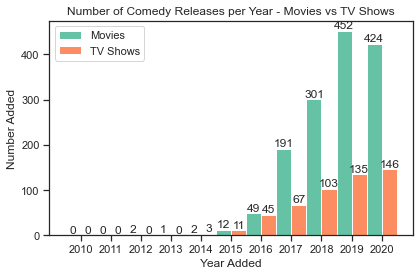

In [28]:
#Graph movies vs shows
labels = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
Movie_Releases = [0, 0, 2, 1, 2, 12, 49, 191, 301, 452, 424]
TV_Show_Releases = [0, 0, 0, 0, 3, 11, 45, 67, 103, 135, 146]

#Label location
x = np.arange(len(labels))
#Bar width
width = 0.5

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Movie_Releases, width, label='Movies')
rects2 = ax.bar(x + width/2, TV_Show_Releases, width, label='TV Shows')

#Labels
ax.set_ylabel('Number Added')
ax.set_xlabel('Year Added')
ax.set_title('Number of Comedy Releases per Year - Movies vs TV Shows')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#Numbers above bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()